In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  

In [3]:
df=pd.read_csv('diabetes (1).csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: xlabel='Age', ylabel='Pregnancies'>

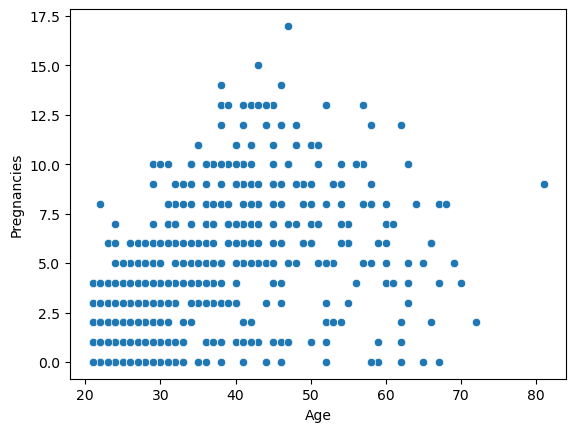

In [9]:
sns.scatterplot(df,x='Age',y='Pregnancies')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
y.unique()

array([1, 0])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

In [19]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
742,1,109,58,18,116,28.5,0.219,22
721,1,114,66,36,200,38.1,0.289,21
741,3,102,44,20,94,30.8,0.400,26
162,0,114,80,34,285,44.2,0.167,27
552,6,114,88,0,0,27.8,0.247,66
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [25]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
742,1,109,58,18,116,28.5,0.219,22
721,1,114,66,36,200,38.1,0.289,21
741,3,102,44,20,94,30.8,0.400,26
162,0,114,80,34,285,44.2,0.167,27
552,6,114,88,0,0,27.8,0.247,66


In [30]:
y_pred=classifier.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))

0.7262135922330097
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       332
           1       0.61      0.62      0.62       183

    accuracy                           0.73       515
   macro avg       0.70      0.70      0.70       515
weighted avg       0.73      0.73      0.73       515



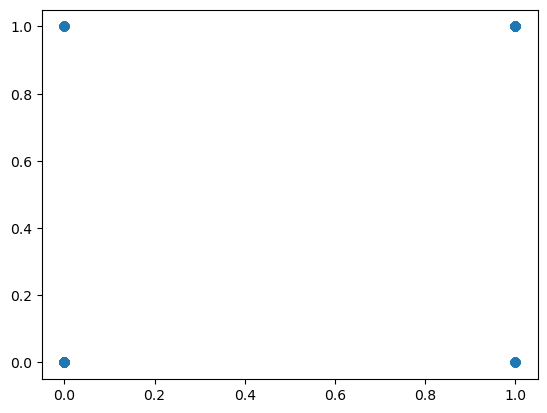

In [34]:
plt.scatter(y_test,y_pred)

[Text(0.5639204545454546, 0.9615384615384616, 'x[1] <= 127.5\nentropy = 0.921\nsamples = 253\nvalue = [168, 85]'),
 Text(0.23011363636363635, 0.8846153846153846, 'x[7] <= 28.5\nentropy = 0.684\nsamples = 165\nvalue = [135, 30]'),
 Text(0.09090909090909091, 0.8076923076923077, 'x[1] <= 106.5\nentropy = 0.34\nsamples = 95\nvalue = [89, 6]'),
 Text(0.06818181818181818, 0.7307692307692307, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.11363636363636363, 0.7307692307692307, 'x[0] <= 1.5\nentropy = 0.629\nsamples = 38\nvalue = [32, 6]'),
 Text(0.09090909090909091, 0.6538461538461539, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.13636363636363635, 0.6538461538461539, 'x[2] <= 79.0\nentropy = 0.828\nsamples = 23\nvalue = [17, 6]'),
 Text(0.09090909090909091, 0.5769230769230769, 'x[2] <= 63.0\nentropy = 0.629\nsamples = 19\nvalue = [16, 3]'),
 Text(0.06818181818181818, 0.5, 'x[5] <= 33.7\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.045454545454545456, 0.423076

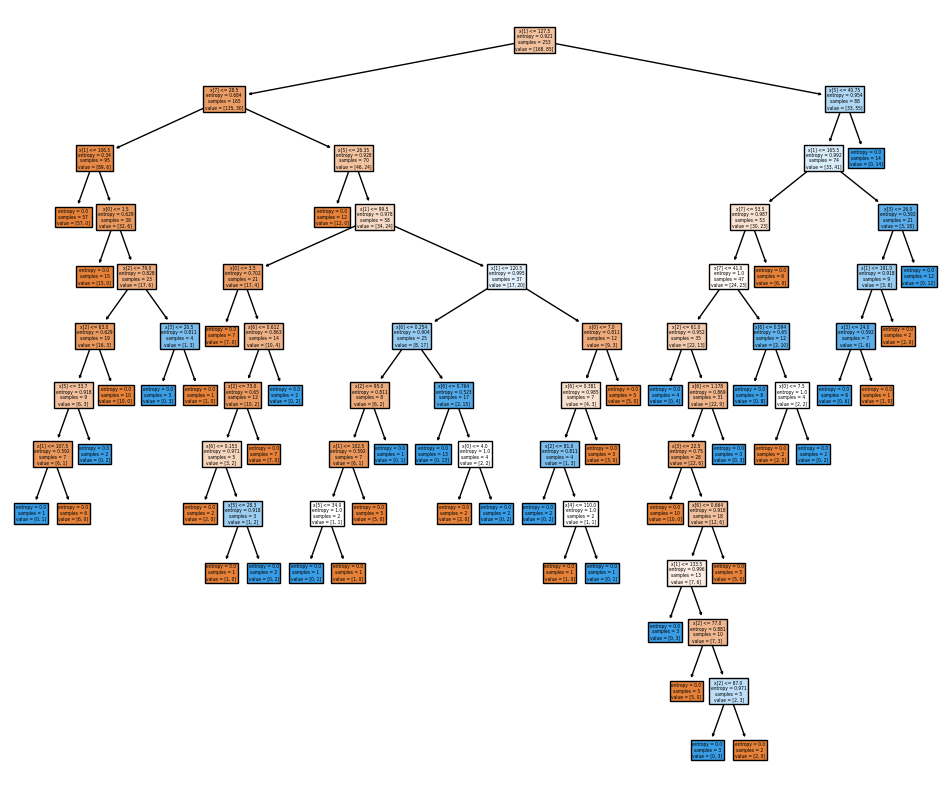

In [35]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)